<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/SeATAC_Ascl1_MEFs_D22_analysis_sf3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare MACS2 and SeATAC for detecting differential V-plots of ATAC-seq data between MEFs and MEFs at day22 post Ascl1 induction 

This task runs on SeATAC `v0.4.0`

In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages from CRAN

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  "GenomicAlignments",
  'BSgenome.Mmusculus.UCSC.mm10',
  'motifmatchr',
  'uwot',
  'igraph',
  'VennDiagram',
  'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db',
  'clusterProfiler',
  'patchwork'
 )

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'GenomicAlignments',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'uwot', 'igraph',
  'VennDiagram', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db',
  'clusterProfiler', 'patchwork'

also installing the dependencies ‘rjson’, ‘pracma’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘filelock’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘lazyeval’, ‘restfulr’, ‘poweRlaw’, ‘annotate’, ‘R.utils’, ‘plogr’, ‘formatR’, ‘BiocFileCache’, ‘png’, ‘gridExtra’, ‘fastmatch’, ‘ggfun’, ‘ggplotify’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ape’, ‘tidytree’, ‘treeio’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘snow’, ‘BH’, ‘rtracklayer’, ‘matrixStats’

In [ ]:
library(devtools)

Loading required package: usethis



In [ ]:
BiocManager::install(c('TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db',
  'clusterProfiler'))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'TxDb.Mmusculus.UCSC.mm10.knownGene' 'org.Mm.eg.db'
  'clusterProfiler'”
Old packages: 'blob', 'RColorBrewer'



### Install R packages from github

In [ ]:
install_github("GreenleafLab/chromVARmotifs")

blob         (1.2.2 -> 1.2.3) [CRAN]
RColorBrewer (1.1-2 -> 1.1-3) [CRAN]


Installing 2 packages: blob, RColorBrewer

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp3V9aEV/remotes614118d9b2/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]
gplots       (NA     -> 3.1.1       ) [CRAN]


Installing 3 packages: TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix, gplots

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/Rtmp3V9aEV/remotes61529be1c/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp3V9aEV/remotes616ca0d788/YuLab-SMU-ChIPseeker-5371322/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.3.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install `seatac` from github

In [ ]:
install_github('gongx030/seatac', quiet = FALSE, ref = 'v0.4.0') # install from the branch v0.4.0
devtools::reload(pkgload::inst("seatac"))
library(seatac)

tfautograph  (NA -> 0.3.2 ) [CRAN]
config       (NA -> 0.3.1 ) [CRAN]
here         (NA -> 1.0.1 ) [CRAN]
RcppTOML     (NA -> 0.1.7 ) [CRAN]
zeallot      (NA -> 0.1.0 ) [CRAN]
tfruns       (NA -> 1.5.0 ) [CRAN]
tensorflow   (NA -> 2.8.0 ) [CRAN]
reticulate   (NA -> 1.24  ) [CRAN]
keras        (NA -> 2.8.0 ) [CRAN]
abind        (NA -> 1.4-5 ) [CRAN]
tfdatasets   (NA -> 2.7.0 ) [CRAN]
tfprobabi... (NA -> 0.15.0) [CRAN]


Installing 12 packages: tfautograph, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp3V9aEV/remotes614f40181e/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [ ]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(igraph)
library(VennDiagram)
library(ggplot2)
library(patchwork)
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(clusterProfiler)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 35.14595 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 20L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 10L,
  vae_num_peaks = 5000L,
  vae_latent = c(5L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,
  padjusted_cutoff = 0.05,
  log_ratio_cutoff = 0.1,
  upstream = -5000,
  downstream = 1000,
  pvalueCutoff = 1,
  qvalueCutoff = 1,
  nucleoatac_cutoff = 0.1,
  center_width = 100L # the center width
)

#MEFs

## Load data

In [ ]:
remote_bam_files = c(
  MEF = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam',
  MEF_Ascl1_D22 = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam'
)
for (f in remote_bam_files){
  system(sprintf('wget -cx %s', f))
}
local_bam_files <- gsub('https://', './', remote_bam_files)

In [ ]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (f in remote_bed_files){
  system(sprintf('wget -cx %s', f))
}
local_bed_files <- gsub('https://', './', remote_bed_files)

### Read V-plots

In [ ]:
gr0 <- lapply(local_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = 200L)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



In [ ]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(local_bam_files)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

number of training peaks for VaeModel: 4266

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



### Training VAE model for V-plots

As of 1/20/2022, Colab had errors on the first run. Run the cell again will resolve the issue.

In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 3497.1491268 | loss_reconstruction= 3496.6299618 | loss_kl=    0.5191471

epoch=     2/   200 | beta=1.000e+00 | loss= 2767.1735983 | loss_reconstruction= 2766.1111989 | loss_kl=    1.0624164

epoch=     3/   200 | beta=1.000e+00 | loss= 2402.8353343 | loss_reconstruction= 2401.2578484 | loss_kl=    1.5774913

epoch=     4/   200 | beta=1.000e+00 | loss= 1991.5794319 | loss_reconstruction= 1990.5363698 | loss_kl=    1.0430465

epoch=     5/   200 | beta=1.000e+00 | loss= 1475.0698242 | loss_reconstruction= 1474.3840619 | loss_kl=    0.6857655

epoch=     6/   200 | beta=1.000e+00 | loss=  967.8018242 | loss_reconstruction=  967.5211451 | loss_kl=    0.2806833

epoch=     7/   200 | beta=1.000e+00 | loss=  615.6545446 | loss_reconstruction=  615.5272773 | loss_kl=    0.1272746

epoch=     8/   200 | beta=1.000e+00 | loss=  433.0471559 | loss_reconstruction=  432.9071754 | loss_kl=    0.1399798

epoch=     9/   200 | beta=1.000e+00 | loss=  34

## Call differential Etv2 motif centric V-plots between MEF and D7 MEF by SeATAC

### Extract motif centric regions

In [ ]:
data('homer_pwms') # 321 TF motifs from Homer database

In [ ]:
j <- 9 # Ascl1
homer_pwms[j]

PWMatrixList of length 1
names(1): Ascl1(bHLH)/NeuralTubes-Ascl1-ChIP-Seq(GSE55840)/Homer

In [ ]:
gr <- matchMotifs(homer_pwms[j], gr0, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [ ]:
sprintf('number of motif-centric regions: %s', length(gr)) %>% message()

number of motif-centric regions: 71616



### Read V-plots

In [ ]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.bam

read_bam | reading ./s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.bam



### Get the latent representations of the V-plots

In [ ]:
x <- model %>% predict(x, batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

#Read the regions for Vplots

In [ ]:
res <- read.table('https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/seatac_Ascl1/name1=MEF_name2=MEF_D22_Ascl1/bin_size=5_fragment_size_range_max=640_fragment_size_interval=10_block_size=640/min_reads=10_vae_num_peaks=5000/vae_latent=5_vae_filters0=128_vae_filters=32_vae_downsample_layers=4_vae_upsample_layers=4_vae_epochs=200.tsv', header = TRUE, sep = '\t')

In [ ]:
res <- GRanges(res)

In [ ]:
sprintf('number of motif-centric regions: %s', length(res)) %>% message()

number of motif-centric regions: 71616



In [ ]:
is_signif <- res$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 33594



# V-plots in MEF and MEF Ascl1 at D22 

## V-plots showing nucleosome occupancy at the center in D22 MEF post Ascl1 induction

In [ ]:
is_up <- res$padj < ARGS[['padjusted_cutoff']] & res$log_ratio > ARGS[['log_ratio_cutoff']]
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center: %d', sum(is_up)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center: 5456



Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


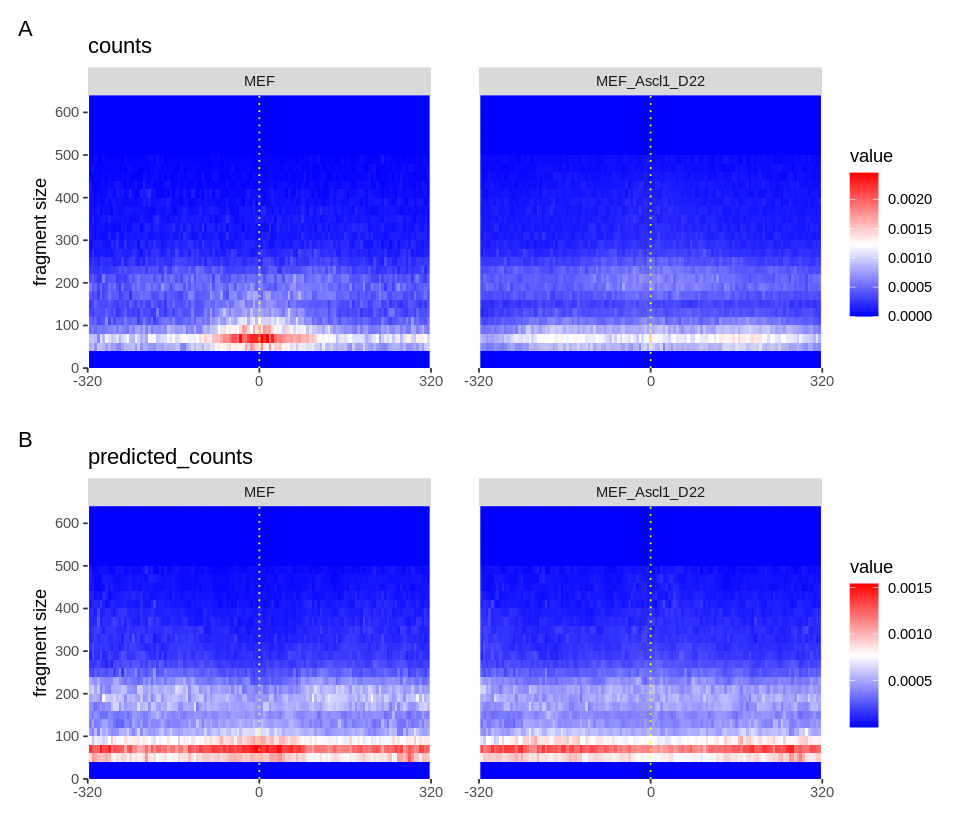

In [ ]:
x2 <- model %>% predict(x[is_up], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L)
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)
options(repr.plot.width = 8, repr.plot.height = 7)
p1 / p2 + plot_annotation(tag_levels = 'A')

## V-plots showing nucleosome occupancy at the center in undifferentiated MEFs

In [ ]:
is_down <- res$padj < 0.05 & res$log_ratio < -log_ratio_cutoff
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center: %d', sum(is_down)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center: 23037



Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


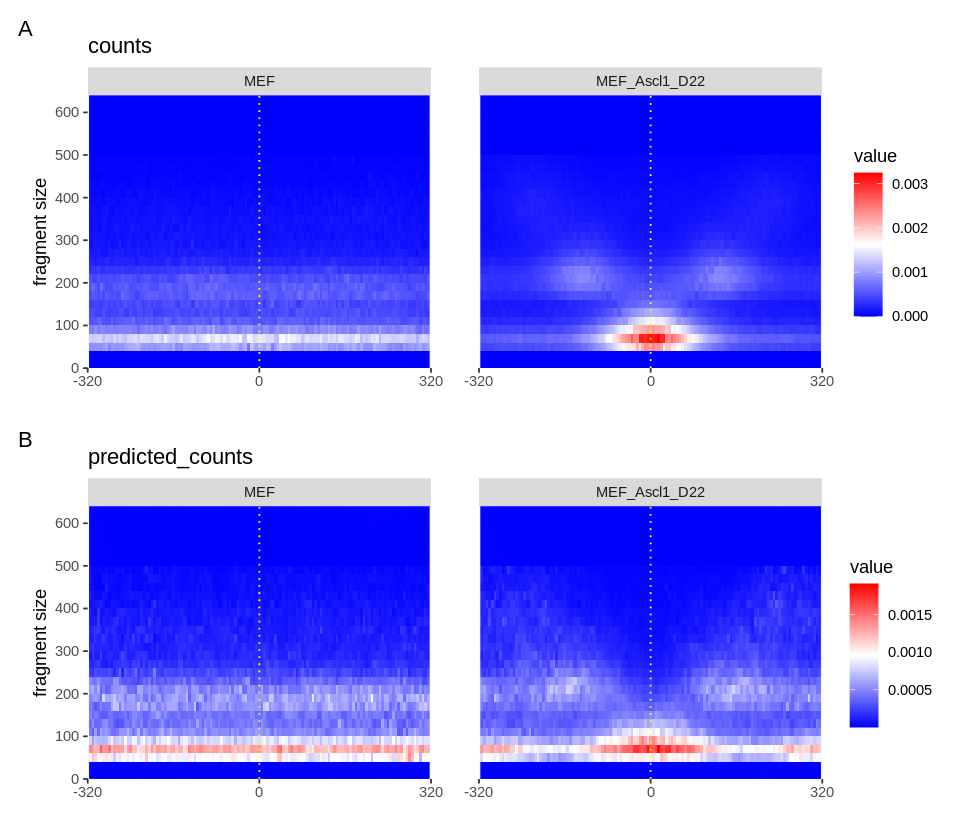

In [ ]:
x2 <- model %>% predict(x[is_down], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L)
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)
options(repr.plot.width = 8, repr.plot.height = 7)
p1 / p2 + plot_annotation(tag_levels = 'A')

# Read the summits called by MACS2 for Ascl1

In [ ]:
remote_summit_files = c(
  MEF = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/macs2_Ascl1_MEF/1_summits.bed',
  MEF_Ascl1_D22 = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/macs2_Ascl1_MEF/2_summits.bed'
)
for (f in remote_summit_files){
  system(sprintf('wget -cx %s', f))
}
local_summit_files <- gsub('https://', './', remote_summit_files)

In [ ]:
x1 <- read.table(local_summit_files[1], header = FALSE, sep = '\t')
x2 <- read.table(local_summit_files[2], header = FALSE, sep = '\t')
gr_macs <- list(x1, x2)
gr_mefs <- lapply(gr_macs, function(g){
  GRanges(seqnames = g[, 1], range = IRanges(start = g[, 2], end = g[, 3]), score = g[, 5])
}
)

In [ ]:
sprintf('# of summits  called by MACS2 in undifferentiated MEFs: %d', length(gr_mefs[[1]])) %>% message()
sprintf('# of summits called by MACS2 in MEFs at D22 post Ascl1 induction: %d', length(gr_mefs[[2]])) %>% message()

# of summits  called by MACS2 in undifferentiated MEFs: 30255

# of summits called by MACS2 in MEFs at D22 post Ascl1 induction: 93016



In [ ]:
names(gr_mefs) <- c('MEF','MEF_Ascl1_D22')

Instead of looking at the overlap between MACS2 summits with the entire 640 bp V-plot window, we only look at the center 100 bp region, which is consistent with the way that SeATAC calculate the central nucleosome values

In [ ]:
mm <- lapply(gr_mefs, function(g){
  findOverlaps(g, resize(res, fix = 'center', width = ARGS[['center_width']])) %>% as.matrix()
}
)

In [ ]:
mm <- lapply(names(mm), function(i){
  cbind(mm[[i]], score = gr_mefs[[i]][mm[[i]][, 'queryHits']]$score)
}
)
names(mm) <- c('MEF','MEF_Ascl1_D22')




In [ ]:
sp <- lapply(mm, function(m){
  split(m[, 'score'], list(m[, 'subjectHits']))
}
)

In [ ]:
score_mef <- sapply(sp$MEF, max)
score_ascl1 <- sapply(sp$MEF_Ascl1_D22, max)

# Read nucleosomal signal obtained by NucleoATAC for Ascl1

In [ ]:
s3_bw_files <- c(
  'MEF' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.nucleoatac_signal.smooth.bw',
  'MEF_Ascl1_D22' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_Ascl1_22d.nucleoatac_signal.smooth.bw'
)

In [ ]:
for (i in 1:length(s3_bw_files)){
  sprintf('wget -x -c -nH %s', s3_bw_files[i]) %>% system()
}
s3_bw_files <- gsub('https://s3.msi.umn.edu/', './', s3_bw_files)
message(sprintf('all s3_bw_files exist: %s', all(file.exists(s3_bw_files))))

all s3_bw_files exist: TRUE



In [ ]:
bw <- lapply(s3_bw_files, function(bw_file){
 rtracklayer::import.bw(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(res, fix = 'center', width = ARGS[['center_width']])))
  ) 
})

In [ ]:
cvg_bd <- lapply(bw, function(x){coverage(x, weight = 'score')[resize(res, fix = 'center', width = ARGS[['center_width']])] %>% as.matrix()})

In [ ]:
cvg <- data.frame(Ascl1 = rowMeans(cvg_bd$MEF_Ascl1_D22), MEF = rowMeans(cvg_bd$MEF))

In [ ]:
cvg$ascl1 <- ifelse(cvg$Ascl1 < cvg$MEF, 'TRUE','FALSE') # NFR in D22 MEFs post Ascl1 induction

In [ ]:
cvg$mef <- ifelse(cvg$Ascl1 > cvg$MEF, 'TRUE','FALSE')  # NFR in undifferentiated MEFs

In [ ]:
cvg$difference <- cvg$Ascl1 - cvg$MEF

# Granges containing SeATAC, MACS2 and NucleoATAC data for region with increased nucleosome occupany in undifferentiated MEFs

In [ ]:
down_mef <- res      #Down in undifferentiated MEFs
down_mef$macs2 <- 0
down_mef[as.numeric(names(score_ascl1))]$macs2 <- score_ascl1
down_mef$seatac <- -log10(down_mef$padj + 1e-100)
down_mef$difference <- cvg$difference
down_mef$ascl1 <- cvg$ascl1

##Pathway analysis for NFR regions in D22 MEFs post Ascl1 induction

In [ ]:
up_ascl1 <- list(seatac = down_mef[down_mef$log_ratio < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']]], 
  macs2 = down_mef[down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])],
  nucleoatac = down_mef[down_mef$difference < -ARGS[[]'nucleoatac_cutoff'] & down_mef$ascl1 == TRUE]
  )

In [ ]:
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center in MEFs at D22 post Ascl1 induction with log ratio cutoff of 0.1 : %d', length(up_ascl1[[1]])) %>% message()
sprintf('# of summits called by MACS2 in MEFs at D22 post Ascl1 induction : %d', length(up_ascl1[[2]])) %>% message()
sprintf('# of regions with increased nucleosome occupancy in undifferentiated MEFs : %d', length(up_ascl1[[3]])) %>% message()


# of Vplots that have increased nuclsoeome occupancy at the center in MEFs at D22 post Ascl1 induction with log ratio cutoff of 0.1 : 23037

# of summits called by MACS2 in MEFs at D22 post Ascl1 induction : 21092

# of regions with increased nucleosome occupancy in undifferentiated MEFs : 15583



###Annotate the peaks 

In [ ]:
anno_up_ascl1 <- lapply(up_ascl1, function(s){annotatePeak(s, tssRegion = c(ARGS[['upstream']], ARGS[['downstream']]),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')})

>> preparing features information...		 2022-04-11 08:01:44 PM 
>> identifying nearest features...		 2022-04-11 08:01:45 PM 
>> calculating distance from peak to TSS...	 2022-04-11 08:01:46 PM 
>> assigning genomic annotation...		 2022-04-11 08:01:46 PM 
>> adding gene annotation...			 2022-04-11 08:02:02 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-11 08:02:02 PM 
>> done...					 2022-04-11 08:02:02 PM 
>> preparing features information...		 2022-04-11 08:02:02 PM 
>> identifying nearest features...		 2022-04-11 08:02:02 PM 
>> calculating distance from peak to TSS...	 2022-04-11 08:02:03 PM 
>> assigning genomic annotation...		 2022-04-11 08:02:03 PM 
>> adding gene annotation...			 2022-04-11 08:02:05 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-11 08:02:05 PM 
>> done...					 2022-04-11 08:02:05 PM 
>> preparing features information...		 2022-04-11 08:02:05 PM 
>> identifying nearest features...		 2022-04-11 08:02:05 PM 
>> calculating distance from peak to TSS...	 2022-04-11 08:02:06 PM 
>> assigning genomic annotation...		 2022-04-11 08:02:06 PM 
>> adding gene annotation...			 2022-04-11 08:02:08 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-11 08:02:08 PM 
>> done...					 2022-04-11 08:02:08 PM 


In [ ]:
dat_ascl1<- lapply(anno_up_ascl1, function(x){
  data.frame(x)
})

### Go enrichment Analysis

In [ ]:
go_up_ascl1 <- lapply(dat_ascl1, function(a){
  enrichGO(gene = a$geneId,
                OrgDb         = org.Mm.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = ARGS[['pvalueCutoff']],
                qvalueCutoff  = ARGS[['qvalueCutoff']],
        readable      = TRUE)
}
)

In [ ]:
top <- lapply(go_up_ascl1, function(g){
   g[g$Description %in% c('Notch signaling pathway','regulation of neurogenesis','neuroblast proliferation', 'regulation of neuron development', 'neuron migration', 'axonogenesis','central nervous system neuron development','axon guidance','forebrain development','cerebral cortex development','adult heart development'),]
})


In [ ]:
top <- lapply(top, function(g){
  g[!grepl('negative|positive', g$Description, ignore.case = TRUE),]
})

## Long dataframe for Ascl1

In [ ]:
top <- Map(cbind, top, method = as.factor(names(top)))

In [ ]:
df_ascl1 <- do.call('rbind', top)

In [ ]:
df_ascl1 <- df_ascl1[,c('ID','Description','p.adjust', 'Count', 'method','GeneRatio')]

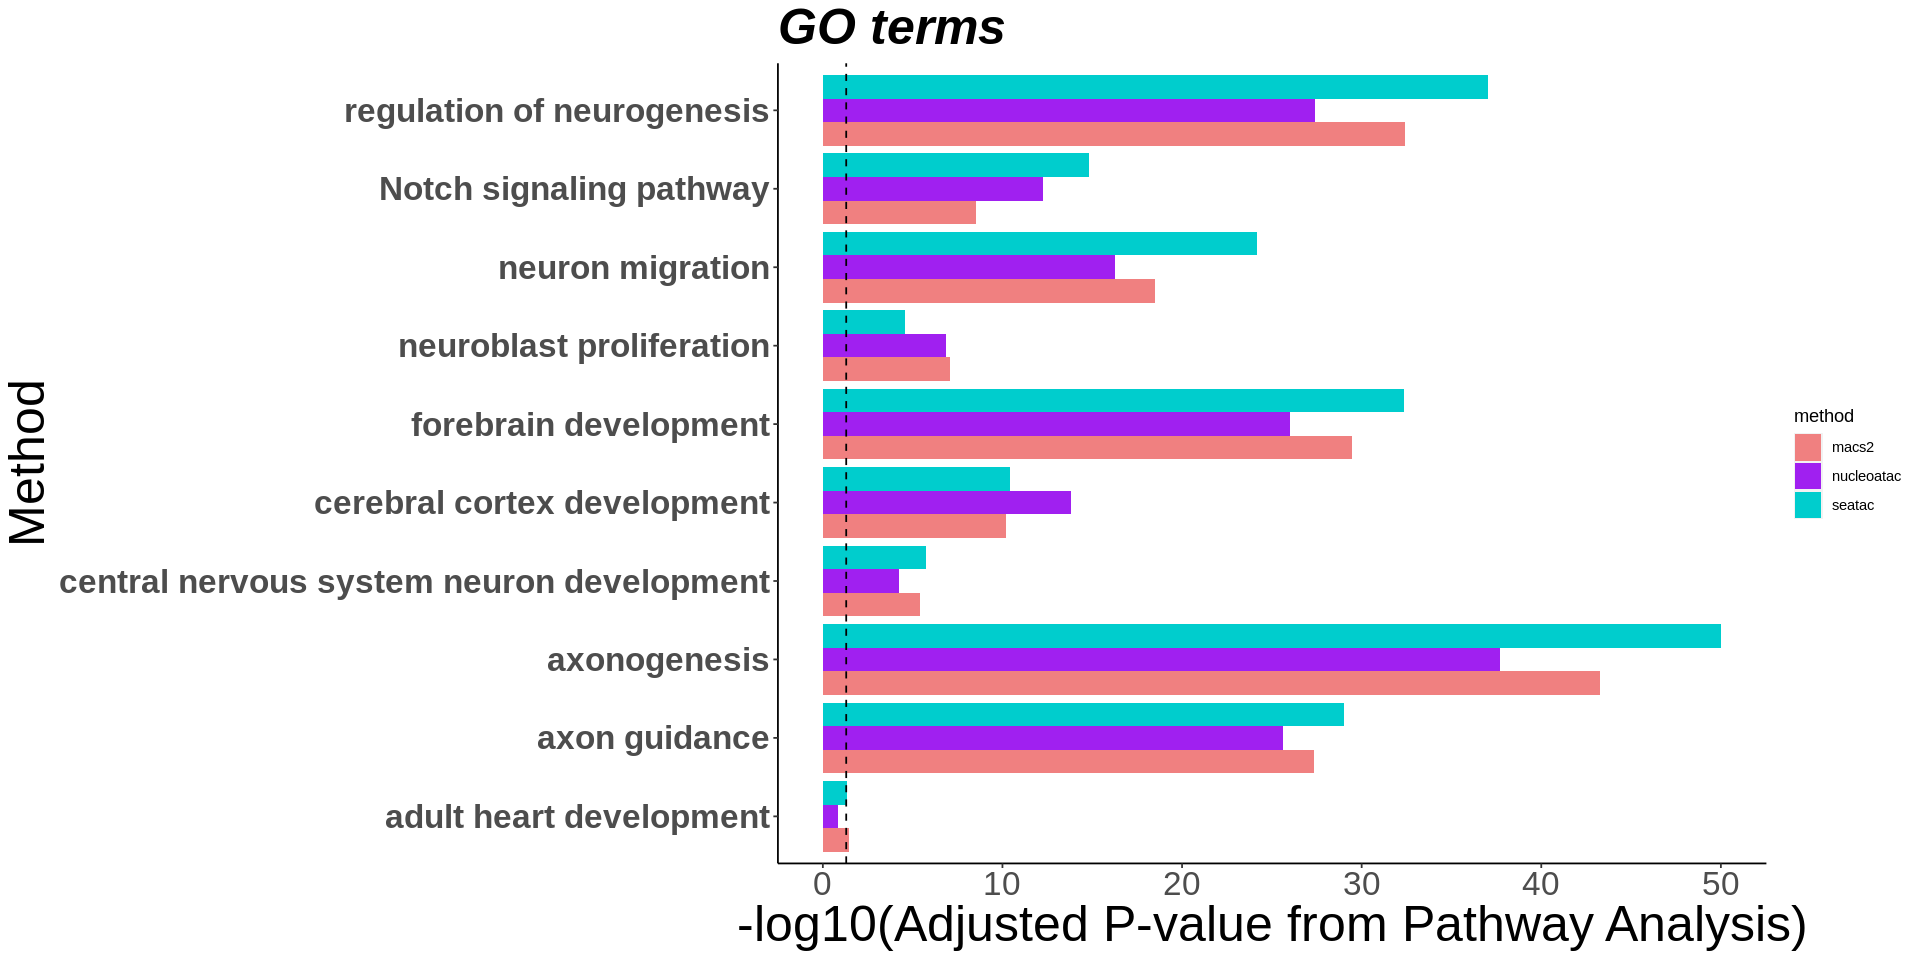

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 8)
df_ascl1 %>%
    ggplot(aes(x = Description, y = -log10(p.adjust), fill = method)) + 
      geom_bar(stat='identity', position='dodge') +
      geom_hline(yintercept = -log10(0.05), linetype = 'dashed') +
      coord_flip() +
      scale_fill_manual(values = c('lightcoral','purple','cyan3')) +
      xlab('Method') +
      ylab('-log10(Adjusted P-value from Pathway Analysis)') +
      ggtitle('GO terms') +
      theme(
           strip.text = element_text(size = 20),
           axis.title.x = element_text(size = 30),
           axis.title.y = element_text(size = 30),
           axis.text.x = element_text(size = 20),
           axis.text.y = element_text(size = 20, face = 'bold'),
           plot.title = element_text(size=30, face='bold.italic'),
           panel.grid.major = element_blank(), 
           panel.grid.minor = element_blank(),
           panel.background = element_blank(), 
           axis.line = element_line(colour = "black")
           ) 

#Venn Diagram showing overlap between SeATAC only, MACS2 only and NucleoATAC only regions

(polygon[GRID.polygon.1139], polygon[GRID.polygon.1140], polygon[GRID.polygon.1141], polygon[GRID.polygon.1142], polygon[GRID.polygon.1143], polygon[GRID.polygon.1144], text[GRID.text.1145], text[GRID.text.1146], text[GRID.text.1147], text[GRID.text.1148], text[GRID.text.1149], text[GRID.text.1150], text[GRID.text.1151], text[GRID.text.1152], text[GRID.text.1153], text[GRID.text.1154]) 

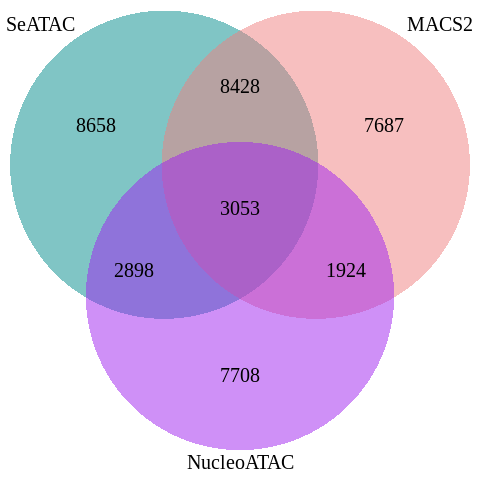

In [ ]:
options(repr.plot.width=4, repr.plot.height=4)
draw.triple.venn(
    area1 = length(down_mef[down_mef$log_ratio < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']]]),                         # Create venn diagram with three sets
    area2 = length(down_mef[down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])]),
    area3 = length(down_mef[down_mef$difference < -0.1 & down_mef$ascl1 == TRUE]),
    n12 = length(down_mef[down_mef$log_ratio  < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])]),
    n23 = length(down_mef[down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']]) & down_mef$difference < -0.1 & down_mef$ascl1 == TRUE]),
    n13 = length(down_mef[down_mef$log_ratio < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$difference < -0.1 & down_mef$ascl1 == TRUE]), 
    n123 = length(down_mef[down_mef$log_ratio < -ARGS[['log_ratio_cutoff']] & down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']]) & down_mef$difference < -0.1 & down_mef$ascl1 == TRUE]),
    category = c("SeATAC", 'MACS2','NucleoATAC'), 
    lty = "blank", 
    fill = c("cyan4", "lightcoral","purple"),
    scale = FALSE
    )

# VPLOTS for SeATAC only, MACS2 only and NucleoATAC only regions

#SeATAC Only

In [ ]:
only_seatac <- down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$log_ratio < -ARGS[['log_ratio_cutoff']] & !down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']]) & !(down_mef$difference < -0.1 & down_mef$ascl1== TRUE)
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs: %d', sum(only_seatac)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs: 8658



In [ ]:
x2 <- model %>% predict(x[only_seatac], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        SeATAC only') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

# MACs2 Only

In [ ]:
only_macs2 <- down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']])  & !(down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$log_ratio < -ARGS[['log_ratio_cutoff']]) & !(down_mef$difference < -0.1 & down_mef$ascl1== TRUE)
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs and summits called by MACS2 in MEFs post Ascl1 induction: %d', sum(only_macs2)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs and summits called by MACS2 in MEFs post Ascl1 induction: 7687



In [ ]:
x3 <- model %>% predict(x[only_macs2], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p3 <- vplot(x3, 'counts', ncol = 2L) + ggtitle('counts                                  SeATAC & MACS2') 
p4 <- vplot(x3, 'predicted_counts', ncol = 2L)

#NucleoATAC Only

In [ ]:
only_nucleoatac <- !(down_mef$padj < ARGS[['padjusted_cutoff']] & down_mef$log_ratio < -ARGS[['log_ratio_cutoff']]) & !down_mef$macs2 > -log10(ARGS[['padjusted_cutoff']]) & down_mef$difference < -0.1 & down_mef$ascl1== TRUE
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center and regions from NucleoATAC with increased nucleosome occupance for undifferentiated EBs : %d', sum(seatac_nucleoatac)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center and regions from NucleoATAC with increased nucleosome occupance for undifferentiated EBs : 7708



In [ ]:
x4 <- model %>% predict(x[only_nucleoatac], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p5 <- vplot(x4, 'counts', ncol = 2L) + ggtitle('counts                                  SeATAC & NucleoATAC') 
p6 <- vplot(x4, 'predicted_counts', ncol = 2L)

# Vplots for EBs

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


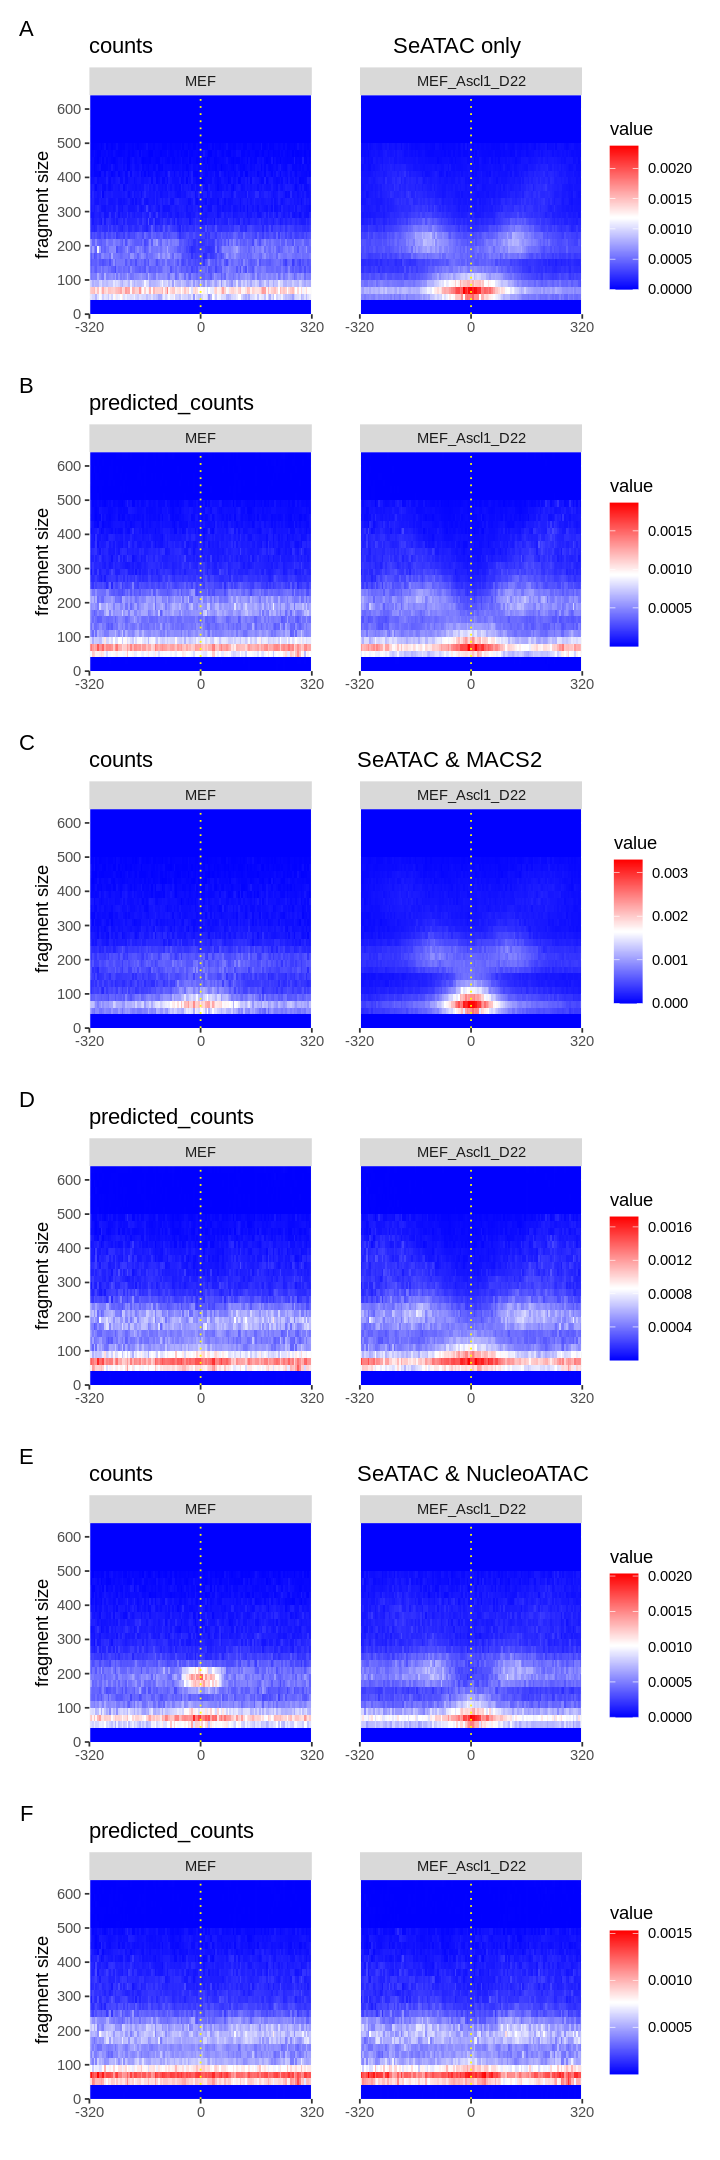

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 18)
p1 / p2 / p3/ p4 / p5 / p6 + plot_annotation(tag_levels = 'A')

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] clusterProfiler_4.2.2                    
 [2] org.Mm.eg.db_3.14.0                      
 [3] TxDb.Mmusculus.UCSC.mm10.knownGene_3.10.0
 [4] GenomicFeatures_1.46.5                   
 [5] AnnotationDbi_1.56.2                     
 [6] ChIPse

In [ ]:
Sys.time() - start_time

Time difference of 1.459852 hours